### Heart Disease Prediction

## 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.anaconda', '.bash_history', '.cache', '.conda', '.condarc', '.continuum', '.gitconfig', '.ipynb_checkpoints', '.ipython', '.jupyter', '.matplotlib', '.p2', '.spyder-py3', '.vscode', '3D Objects', 'Ambiente de Impressão', 'Ambiente de Rede', 'anaconda3', 'AppData', 'Configurações Locais', 'Cookies', 'Dados de Aplicativos', 'Documents', 'Downloads', 'Favorites', 'heart.csv', 'heart_disease_prediction.ipynb', 'IntelGraphicsProfiles', 'Links', 'Menu Iniciar', 'Meus Documentos', 'Microsoft', 'Modelos', 'Music', 'NTUSER.DAT', 'ntuser.dat.LOG1', 'ntuser.dat.LOG2', 'NTUSER.DAT{dcd02582-c272-11ed-a2c3-9c2d4744dec9}.TM.blf', 'NTUSER.DAT{dcd02582-c272-11ed-a2c3-9c2d4744dec9}.TMContainer00000000000000000001.regtrans-ms', 'NTUSER.DAT{dcd02582-c272-11ed-a2c3-9c2d4744dec9}.TMContainer00000000000000000002.regtrans-ms', 'ntuser.ini', 'OneDrive', 'Python DataScience.ipynb', 'Recent', 'Saved Games', 'Searches', 'SendTo', 'Videos']


##  2. Importing and understanding our dataset

In [4]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.shape

(303, 14)

#### Description

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
### in this dataset, luckily we dont need to handle missing values

##### Analysing the 'target' variable

In [8]:
df["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [9]:
df["target"].unique()

array([1, 0], dtype=int64)

### Correlation between columns

In [10]:
print(df.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


In [ ]:
#This shows that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.

## Exploratory Data Analysis (EDA)

#### Analysing the target variable:

target
1    165
0    138
Name: count, dtype: int64


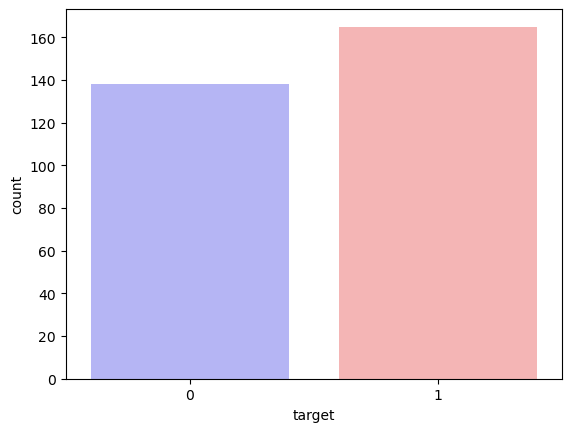

In [11]:
target_temp = df.target.value_counts()
print(target_temp)
sns.countplot(x='target', data=df, palette='bwr')
plt.show()

In [12]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


### Analyse some features

#### Sex

<Axes: xlabel='sex', ylabel='target'>

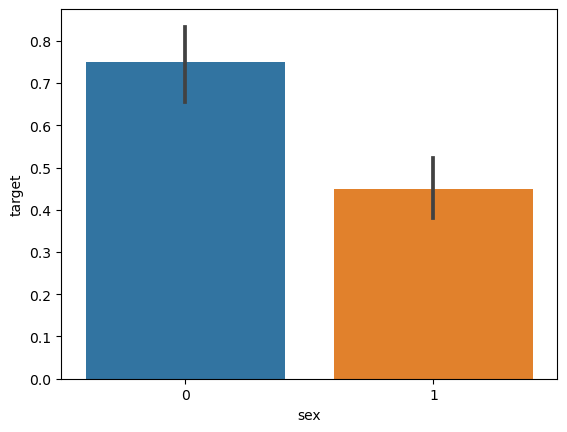

In [13]:
y = df["target"]
sns.barplot(x='sex', y='target', data=df)

We notice, that females are more likely to have heart problems than males

### Chest Pain Type

In [14]:
df["cp"].unique()

array([3, 2, 1, 0], dtype=int64)

<Axes: xlabel='cp', ylabel='target'>

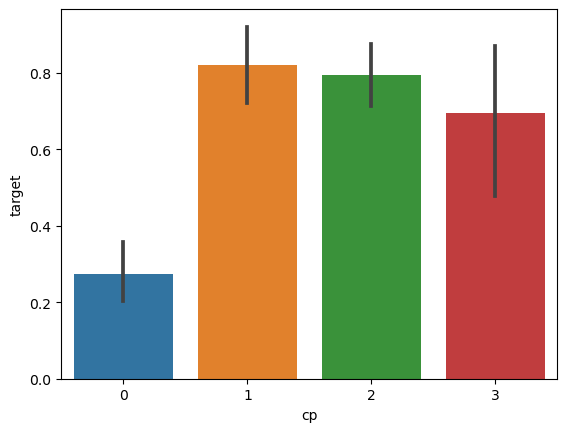

In [15]:
sns.barplot(x='cp', y='target', data=df)

We noticed that with 0 chest pain, the chances of heart disease decrease significantly.

### FBS

In [17]:
df["fbs"].describe()

count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

<Axes: xlabel='fbs', ylabel='target'>

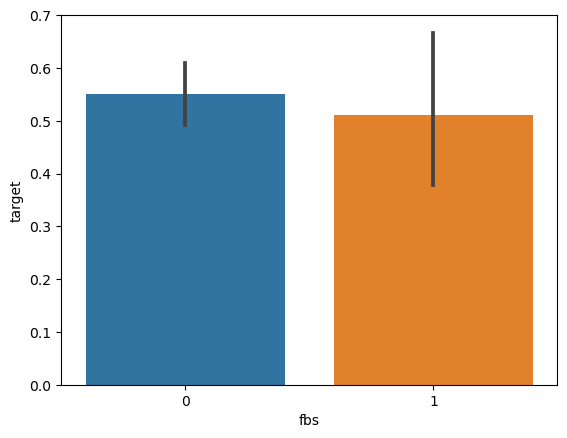

In [18]:
sns.barplot(x='fbs', y='target', data=df)

### restecg

In [19]:
df["restecg"].unique()

array([0, 1, 2], dtype=int64)

<Axes: xlabel='restecg', ylabel='target'>

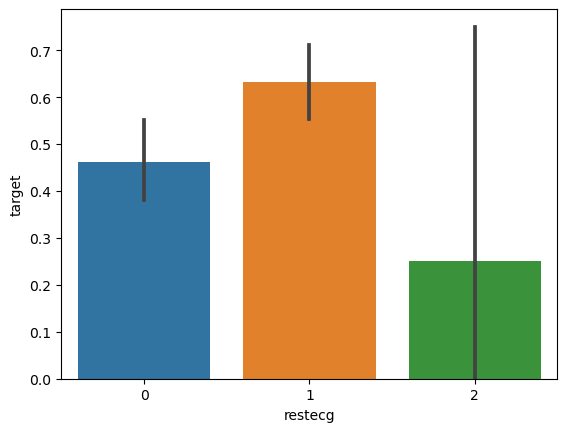

In [20]:
sns.barplot(x='restecg', y='target', data=df)

We realize that people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'

### exang

<Axes: xlabel='exang', ylabel='target'>

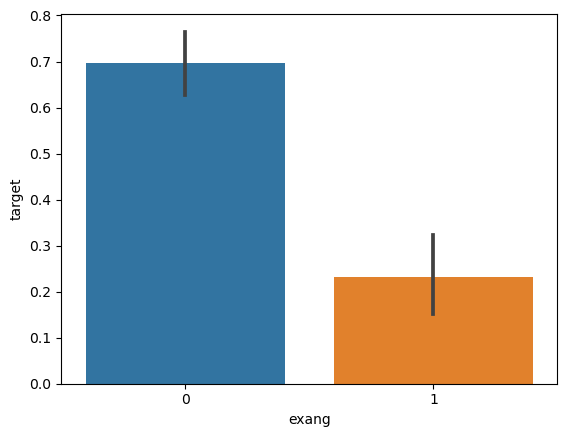

In [21]:
sns.barplot(x='exang', y='target', data=df)

We realize that people with exang=1 i.e. Exercise induced angina are much less likely to have heart problems

### Train Test Split

In [22]:
from sklearn.model_selection import train_test_split

predictors = df.drop("target",axis=1)
target = df["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [23]:
X_train.shape

(242, 13)

In [24]:
X_test.shape

(61, 13)

In [25]:
Y_train.shape

(242,)

In [26]:
Y_test.shape

(61,)

## Model Fitting

#### Logistic Regression

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [29]:
Y_pred_lr.shape

(61,)

In [30]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %


### Naive Bayes

In [31]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [32]:
Y_pred_nb.shape

(61,)

In [33]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.25 %


### SVM

In [34]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [35]:
Y_pred_svm.shape

(61,)

In [36]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 81.97 %


### K Nearest Neighbors

In [44]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn = knn.predict(X_test)

In [45]:
Y_pred_knn.shape

(61,)

In [46]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 67.21 %


### Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        

dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [48]:
Y_pred_dt.shape

(61,)

In [49]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 81.97 %


### Random Forest

In [82]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, Y_train)
score_rf = round(rf.score(X_train, Y_train)*100, 2)
Y_pred_rf=rf.predict(X_test)


In [84]:
Y_pred_rf.shape

(61,)

In [86]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 88.52 %


# Comparing Models

In [87]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %
The accuracy score achieved using Naive Bayes is: 85.25 %
The accuracy score achieved using Support Vector Machine is: 81.97 %
The accuracy score achieved using K-Nearest Neighbors is: 67.21 %
The accuracy score achieved using Decision Tree is: 81.97 %
The accuracy score achieved using Random Forest is: 88.52 %


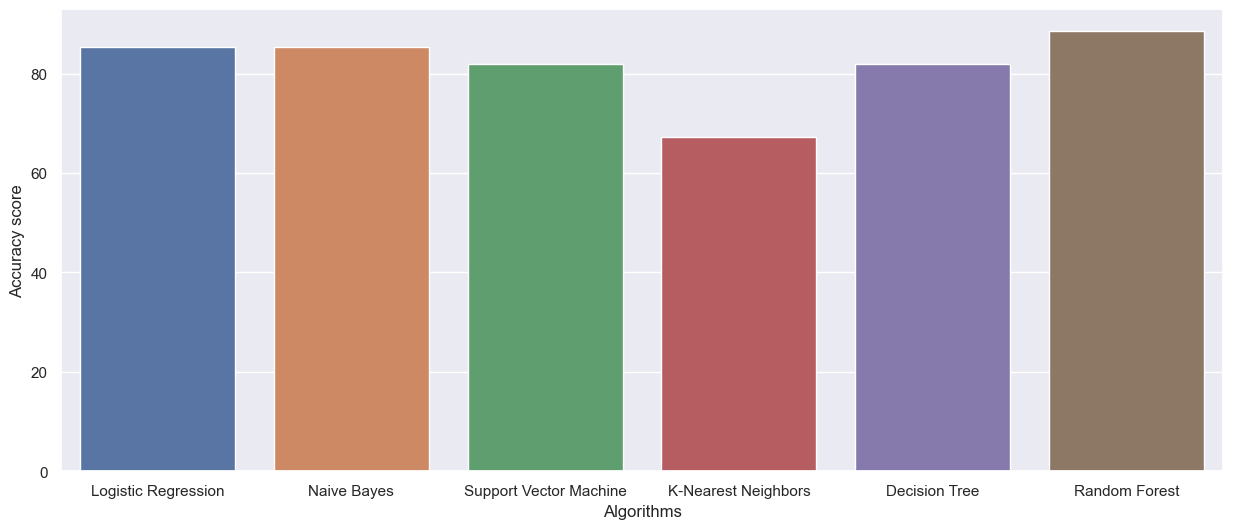

In [88]:

sns.barplot(x=algorithms, y=scores)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
plt.show()

#### Random forest has good result as compare to other algorithms